In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import geopandas
import plotly.express as px
import os
from geopandas import GeoDataFrame
from shapely.geometry import Point
import matplotlib.pyplot as plt
import imageio
import mapclassify
import matplotlib
import matplotlib.image as mpimg
import ast
import json
import numpy as np
import shapely.wkt
import math

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
import matplotlib
pd.set_option('display.max_columns', None)
from six.moves import reduce
import scipy
from sklearn.metrics import r2_score
#scipy.stats.pearsonr
import scipy.stats as stats
plt.rcParams.update({'font.family': 'Arial'})

In [2]:
#conda install seaborn

In [3]:
variables = ['H_Area_of_store', 
       'R_Percentage_of_Visits_by_brand', 'J_POI_count_where_store_is',
       'K_POI_diversity_where_store_is', 'L_Demographic_similarity',
       'G_Distance_between_cbg_and_store']

In [4]:
vars_definition = {'H_Area_of_store': 'Store area', 
       'R_Percentage_of_Visits_by_brand': 'Chain loyalty', 'J_POI_count_where_store_is': 'POI count',
       'K_POI_diversity_where_store_is': 'POI diversity', 'L_Demographic_similarity': 'Demographic similarity',
       'G_Distance_between_cbg_and_store':'CBG-Store Distance'}

In [5]:
titles = {2018: '(a) 2018 Distributions', 2019: '(b) 2019 Distributions', 
          2020: '(c) 2020 Distributions', 2021: '(d) 2021 Distributions',}

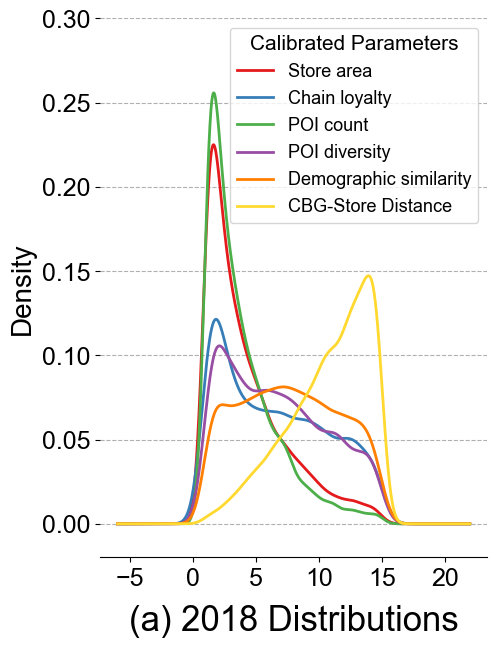

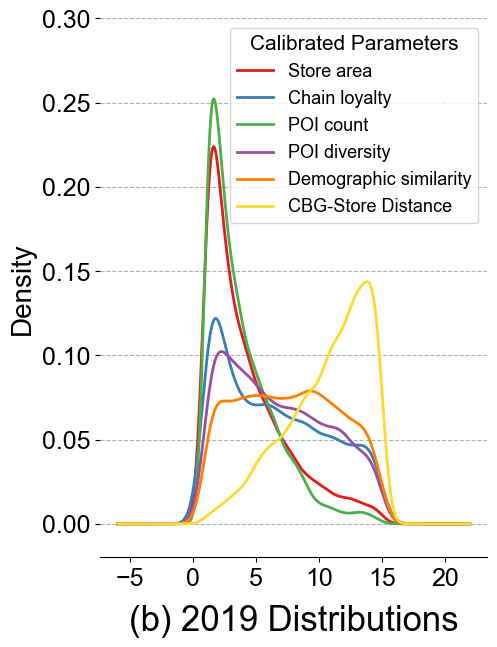

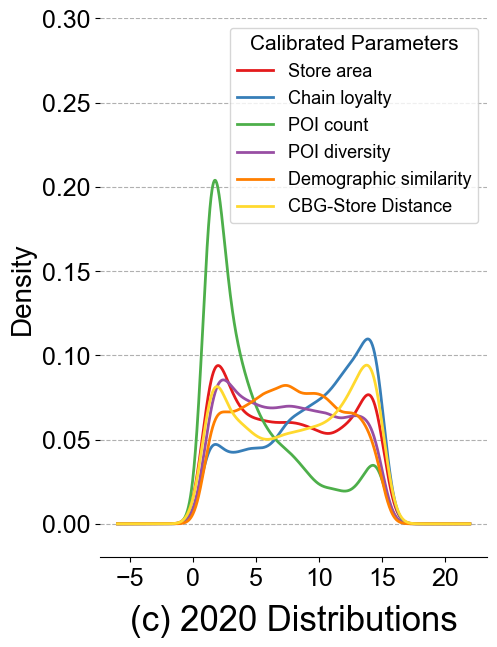

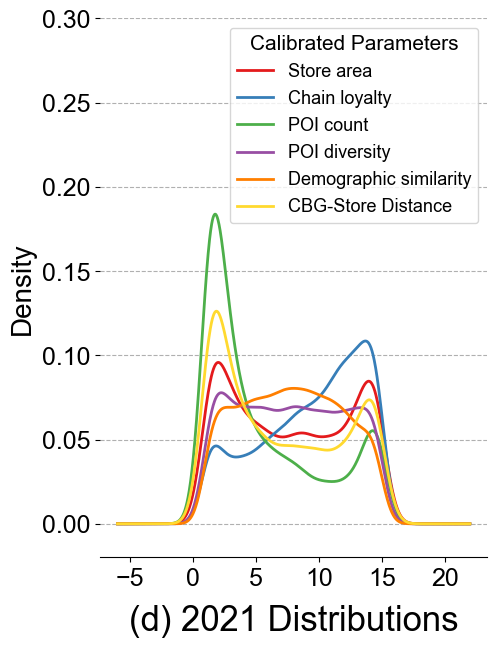

In [6]:
def generate_param_distribution(year):
    param = pd.read_csv(
        'data/3_PSO_results/PSO_calirabtion_results/norm_PSO_combination_'
                        + str(year) + '/PSO_'+ str(year) +'_6params_NYC_norm_28_PSO_15.csv')
        
    param_plotting = param[variables]
    
    ax = param_plotting[~param_plotting.eq('no visitors').any(1)].astype(float).plot.kde(
        figsize=(5,7), lw=2, 
        color = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00', '#ffd92f'])#, colormap=cm.Paired)

    plt.legend(title = 'Calibrated Parameters', fontsize = 13, #bbox_to_anchor=(1, 0.75),
               title_fontsize = 15, 
               labels = ['Store area', 'Chain loyalty', 'POI count', 'POI diversity', 
                         'Demographic similarity', 'CBG-Store Distance'])


    plt.xticks(fontsize = 18)
    plt.yticks(fontsize = 18)
    plt.grid(axis = 'y',linestyle = '--')
    plt.ylim(-0.02, 0.3)
    #plt.xlim(-5, 30)
    plt.ylabel('Density', fontsize = 20)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    #ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    plt.title(titles[int(y)], size = 25, y=-0.15)
    #plt.subplots_adjust(bottom=0.15)
    plt.savefig(
    'Parameter Value Distribution of Calibrated Parameters'
        + str(year)+'.jpg', dpi=300, bbox_inches='tight')

    plt.show()
    
for y in [2018, 2019, 2020, 2021]:
    generate_param_distribution(y)
# generate_param_distribution(2018)